In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Introduction
Matrices are highly versatile mathematical objects. They can store sets of equations, geometric transformations, the positions of particles over time, financial record, etc.

In data science, matrices are sometimes called data tables, in which rows correspond to observations and columns correspond to features.

## Creating and Visualizing Matrices in Numpy
Depending on the context, matrices can be conceptualized as a set of column vectors stacked next to each other, as a set of row vectors layered on top of each other, or as an ordered collection of individual matrix elements.

# Visualizing, Indexing and Slicing Matrices
Small matrices can simply be printed out in full:

$\begin{bmatrix}1 & 2\\\pi & 4\\6 & 7\end{bmatrix},\begin{bmatrix}-6 & 1/3\\ e^{4.3} & -1.4\\6/5 & 0\end{bmatrix}$

But that's not scalable, and matrices that you work with in practice can be large, perhaps containing billions of elements. Therefore, larger matrices can be visualized as images. The numerical value of each element of the matrix maps onto a color in the image. 

Matrices are indicated using bold-faced capital letters, like matrix $\mathbf{A}$ or $\mathbf{M}$. The size of a matrix is indicated using (row, column) convention. The following column is 3x5 because it has 3 rows and 5 columns:

$\begin{bmatrix}1&3 & 5 & 7 & 9\\0 &2 &4 &6 &8\\1 &4 &7 &8 &9\end{bmatrix}$

You can refer to specific elements of a matrix by indexing the row and column position: the element in the third row and fourth column of matrix $\mathbf{A}$ is indicated as $a_{3,4}$. It is important to note that math uses 1-based indexing whereas Python uses 0-based indexing. Thus, element $a_{3,4}$ is indexed in Python as A[2,3].

Extracting a subset of the rows or columns of a matrix is done through slicing. To extract a section of a matrix, you specify the start, end and step of the slice.

In [4]:
#extracting a submatrix from rows 2-4 and columns 1-5 of a larger matrix
A = np.arange(60).reshape(6,10)
sub = A[1:4,0:5]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

## Special Matrices
There is an infinite number of matrices because there is an infinite number of ways of organizing numbers into a matrix. But matrices can be described using a relatively small number of characteristics, which creates 'families' or categories of matrices. 

Some categories of matrices are used so frequently that they have dedicated Numpy functions to create them.

Here are some common special matrices
1. Random Numbers matrix - matrix that contains numbers drawn at random from some distribution, typically Gaussian(Normal). Random-number matrices are great for exploring linear algebra in code because they are quickly and easily created with any size and rank. We'll mostly use Gaussian distributed numbers
   
2. Square versus nonsquare - A square matrix has the same number of rows as columns; in other word, the matrix is $\mathbb{R}^{N\times N}$. A non-square, also called a rectangular matrix, has a different number of rows and columns. You can create square and rectangular matrices from random numbers by adjusting the shape parameters in the previous code.

Rectangular matrices are called tall if they have more rows than columns and wide if they have more columns than rows.

3. Diagonal - The diagonal of matrix is the elements starting at the top-left and going down to the bottom-right. A diagonal matrix has zeros on all the off-diagonal elements; The diagonal elements may also contain zeros, but they are the only elements that may contain non-zero values.

The Numpy function np.diag() has two behaviors depending on the inputs: Input a matrix, and np.diag will return the diagonal elements as a vector; input a vector and np.diag will return a matrix with those vector elements on the diagonal.

4. Triangular - A triangular matrix contains all zeros either above or below the main diagonal. The matrix is called upper triangular if the nonzero elements are above the diagonal, and lower triangular if the nonzero elements are below the diagonal.

NumPy has dedicated functions to extract the upper (np.triu()) or lower (np.tril()) triangle of a matrix

5. Identity - It is the equivalent of the number 1, in that any matrix or vector times the identity matrix is that same matrix or vector. The identity matrix is a square diagonal matrix with all diagonal elements having a value of 1. It is indicated with the letter $\mathbf{I}$. A subscript may additional identify its size. Can be created using np.eye()

6. Zeros - Comparable to the zeros vector: It is the matrix of all zeros. It is indicated using a bold-faced zero: $\mathbf{0}$. Can be created using the np.zeros() function.

In [13]:
#Creating random matrices in NumPy
Mrows = 4 #shape 0
Ncols = 6 #shape 1
A = np.random.randn(Mrows,Ncols)

#creating a Diagonal matrix, both methods:
A = np.random.randn(60).reshape(6,10)
b = np.diag(A) #capturing the diagonal elements in a vector
B = np.diag(b) #creating a diagonal matrix from a vector

#Creating a upper and lower triangular matrix
UpT = np.triu(A)
LoT = np.tril(A)

# Creating a identity matrix
I = np.eye(5) # an I_5 identity matrix

# Creating a zeros matrix
Z = np.zeros((3,3)) # a 3x3 zeros matrix

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

## Matrix Math:

# Addition and Subtraction
You can add two matrix by adding their corresponding elements.

$\begin{bmatrix}2&3&4\\1&2&4\end{bmatrix}+\begin{bmatrix}0&3&1\\-1&-4&2\end{bmatrix}=\begin{bmatrix}(2+0)&(3+3)&(4+1)\\(1-1)&(2-4)&(4+2)\end{bmatrix}=\begin{bmatrix}2&6&5\\0&-2&6\end{bmatrix}$

It is only defined between two matrices of the same size.

# Shifting a Matrix
As with vectors, its no formally possible to add a scalar to a matrix, as in $\lambda+\mathbf{A}$. Python allows such an operation, which involves broadcast-adding the scalar to each element of the matrix. It is not a formal linear algebra operation.

But there is a linear algebra way to add a scalar to a square matrix, and that is called shifting a matrix. It works by adding a constant value to the diagonal, which is implemented by adding a scalar multiplied identity matrix.

$\mathbf{A}+\lambda\mathbf{I}$

$\begin{bmatrix}4&5&1\\0&1&11\\4&9&7\end{bmatrix}+6\begin{bmatrix}1&0&0\\0&1&0\\0&0&1\end{bmatrix}=\begin{bmatrix}10&5&1\\0&7&11\\4&9&13\end{bmatrix}$

Notice that only the diagonal elements change; the rest of the matrix is unadulterated by shifting. In practice, one shifts a relatively small amount to preserve as much information as possible in the matrix while benefitting from the effects of shifting, including increasing the numerical stability of the matrix.

There are many ways to calculate the magnitude of the shift. Shifting has two primary applications: it is the mechanism for finding the eigenvalues of a matrix, and it is the mechanism of regularizing matrices when fitting models to data

# Scalar and Hadamard Multiplications
These work the same as they do for vectors, which is to say element-wise.

Scalar multiplication means to multiply each element in the matrix by the same scalar.

$\gamma\begin{bmatrix}a&b\\ c&d\end{bmatrix} = \begin{bmatrix}\gamma a&\gamma b \\\gamma c&\gamma d\end{bmatrix}$

Likewise, Hadamard multiplication involves multiplying two matrices element-wise.

$\begin{bmatrix}2&3\\4&5\end{bmatrix} \odot \begin{bmatrix}a&b\\ c&d\end{bmatrix} = \begin{bmatrix}2a&3b\\4c&5d\end{bmatrix}$

In numpy, Hadamard multiplication can be implemented using the np.multiply() function. But it's easier to implement using an asterisk between the two matrices: $\mathbf{A}*\mathbf{B}$

Hadamard has some use in linear algebra, like when computing the matrix inverse. However is is most often used in applications as a convenient way to store many individual multiplications.

In [25]:
#adding a two matrices:
A = np.arange(0,25).reshape(5,5)
B = np.random.randn(25).reshape(5,5)*10
C = A+B #addition

#shifting in python
lamb = 7
Shift = C + lamb*np.eye(5)

#scalar and Hadamard multiplication
A = np.random.randn(3,4)
B = np.random.randn(3,4)

A*B #Hadamard multiplication
np.multiply(A,B) #also Hadamard
A@B.T #NOT Hadamard

array([[-2.2785217 ,  0.6437713 , -0.36825805],
       [ 0.57259554, -1.61294011, -0.11032609],
       [-0.63241901, -0.19041902,  0.67438595]])

## Standard Matrix Multiplication
Rather than operating element-wise, standard matrix multiplication operates row/column-wise. In fact, standard matrix multiplication reduces to a systematic collection of dot products between rows of one matrix and columns of the other matrix

# Rules for matrix multiplication validity
Matrix sizes are written out as $M\times N$-rows by columns. Two matrices multiplying each other can have different sizes, so let's refer to the second matrix as $N\times K$. When we write out the two multiplicand matrices with their sizes underneath, we can refer to the 'inner' dimensions N and the 'outer' dimensions M and K.

Matrix multiplication is valid only when the 'inner' dimensions match, and the size of the new matrix is defined by the 'outer' dimensions.

More formally, matrix multiplication is valid when the number of columns in the left matrix equals the number of rows in the right matrix, and the size of the product matrix is defined by the number of rows in the left matrix and the number of columns in the right matrix.

Matrix multiplication does not obey the commutative law: $\mathbf{AB}$ may be valid, while $\mathbf{BA}$ is invalid. Even if both multiplications are valid (if both matrices are square), they may produce different results. That is, if $\mathbf{C}=\mathbf{AB}$ and $\mathbf{D}=\mathbf{BA}$, then in general $\mathbf{C}\neq\mathbf{D}$ (they are equal in some special cases, but we cannot generally assume equality).

Note the notation: Hadamard multiplication is indicated using a dotted-circled ($\mathbf{A}\odot\mathbf{B}$) whereas matrix multiplication is indicated as two matrices sides-by-side without any symbol between them ($\mathbf{AB}$).

# Matrix Multiplication
The reason why matrix multiplication is valid only if the number of columns in the left matrix matches the number of rows in the right matrix is that the $(i,j)$th element in the product matrix is the dot product between the $i$th row of the left matrix and the $j$th column in the right matrix.

Below shows an example of matrix multiplication, using the same matrices that we used for Hadamard multiplication. See that each element in the product matrix is computed as dot products of corresponding rows and columns of the left-hand side matrices.

$\begin{bmatrix}2&3\\4&5\end{bmatrix}\begin{bmatrix}a&b\\ c&d\end{bmatrix} = \begin{bmatrix}(2a+3c)&(2b+3d)\\(4a+5c)&(4b+5d)\end{bmatrix}$

Remember that the dot product is a number that encodes the relationship between two vectors. So, the result of matrix multiplication is a matrix that stores all the pairwise linear relationships between the rows of the left matrix and columns of the right matrix. This is the basis for computing covariance and correlation matrices, the general linear model, singular value decomposition, and other applications.

## Matrix-Vector Multiplication
In a purely mechanical sense, matrix-vector multiplication is nothing special. It is simply matrix multiplication where one matrix is a vector.

But matrix-vector multiplication does have many applications in data science, ML, and computer graphics. Some points:<br>
o A matrix can be right-multiplied by a vector but not a row vector and it can be left-multiplied by a row vector but not a column vector. In other words, $\mathbf{A}v$ and $v^T\mathbf{A}$ are valid, but $\mathbf{A}v^T$ and $v\mathbf{A}$ are invalid.<br>
That is clear from inspecting matrix sizes: an $M\times N$ matrix can be premultiplied by a $1\times M$ matrix (aka a row vector) or post multiplied by an $N\times 1$ matrix (aka a column vector).<br>
o The result of matrix-vector multiplication is always a vector, and the orientation of that vector depends on the orientation of the multiplicand vector: premultiplying a matrix by a row vector produces another row vector while post-multiplying a matrix by a column vector produces another column vector.

Matrix Vector multiplication has several applications. In statistics, the model-predicted data values are obtained by multiplying the design matrix by the regression coefficients, which is written as $\mathbf{X}\beta$. In PCA, a vector of 'feature importance' weights is identified that maximizes variance in dataset $\mathbf{Y}$, and is written out as $(\mathbf{Y}^T\mathbf{Y})v$ (that feature-importance vector $v$ is called an eigenvector).

# Linear weighted combinations
We calculated linear weighted combinations by having separate scalars and vectors and then multiplying them individually. But there is a better, more compact, and scalable method for computing linear weighted combinations: put the individual vector in a matrix, and put the weights into corresponding elements of a vector. Then multiply:

$4\begin{bmatrix}3\\0\\6\end{bmatrix} + 3\begin{bmatrix}1\\2\\5\end{bmatrix} => \begin{bmatrix}3&1\\0&2\\6&5\end{bmatrix}\begin{bmatrix}4\\3\end{bmatrix}$

The key insight is that each element in the vector scalar multiplies the corresponding column in the matrix, and then the weighted column vectors are summed to obtain the product.

# Geometric transforms
When we think of a vector as a geometric line, then matrix-vector multiplication becomes a way of rotating and scaling that vector. (scalar-vector multiplication can scale but not rotate).

We will begin with the 2D case for easy visualization. Here are the matrix and vectors.

$x$ was created as a row vector and then transposed into a column vector.




[(-1.0, 7.0), (-1.0, 7.0)]

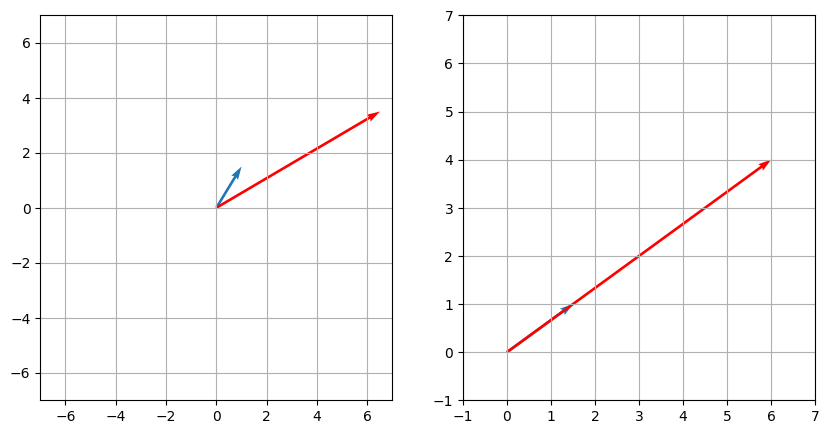

In [14]:
M = np.array([ [2,3],[2,1], ])
x = np.array([ [1,1.5] ]).T
y = x[::-1]
Mx = M@x

fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].quiver([0,0],[0,0],[x[0],Mx[0]],[x[1],Mx[1]],color=['C0','r'],linestyle=['-','--'],scale=1,scale_units='xy',angles='xy')
axs[0].grid()
axs[0].set(xlim=(-7,7),ylim=(-7,7))

My = M@y
axs[1].quiver([0,0],[0,0],[y[0],My[0]],[y[1],My[1]],color=['C0','r'],linestyle=['-','--'],scale=1,angles='xy',scale_units='xy')
axs[1].grid()
axs[1].set(xlim=(-1,7),ylim=(-1,7))

The graph above visualizes these two vectors. You can see that the matrix $\mathbf{M}$ both rotated and stretched the original vector. The other graph uses a different vector, which is the original vector with swapped positions.

Notice in the second graph, how the vector is stretched, but is no longer rotated into a different direction. The matrix still scaled the vector, but its direction was preserved. In other words, the matrix-vector multiplication acted as if it were scalar-vector multiplication. 

This is not a random event, vector $v$ is an eigenvector of matrix $\mathbf{M}$, and the amount by which $\mathbf{M}$ stretched $v$ is its eigenvalue. It is an incredibly important concept.

Hence we end this section by stating that one of the functions of matrix-vector multiplication is for a matrix to house a transformation that, when applied to a vector, can rotate and stretch that vector.

## Matrix Operations: Transpose
Like with the vectors, the transpose of a matrix is indicated with a superscript $T$. And double transposing of a matrix returns the original matrix ($C^{TT} = C$)

Transposing swaps rows and columns, and the mathematical definition is:<br>
$C^T_{i,j} = C_{j,i}$

Here's an example:<br>
$\begin{bmatrix}3&0&4\\9&8&3\end{bmatrix}^T = \begin{bmatrix}3&9\\0&8\\4&3\end{bmatrix}$

There are a few ways to transpose matrices in Python, using a function and a method acting on NumPy arrays:

In [17]:
A = np.array([[3,4,5],[1,2,3]])
A_T1 = A.T #as method
A_T2 = np.transpose(A) #as function
print(A,A_T1,A_T2,sep='\n')

[[3 4 5]
 [1 2 3]]
[[3 1]
 [4 2]
 [5 3]]
[[3 1]
 [4 2]
 [5 3]]


### Dot and Outer Product Notation
Knowing the transpose operation and the rules for matrix multiplication validity, we can return to the notation of the vector dot product. For two column vectors of $M\times 1$, transposing the first vector and not the second gives two 'matrices' of sizes $1\times M$ and $M\times 1$. The 'inner' dimensions match and the 'outer' dimensions tell us that the product will be $1\times 1$, i.e. a scalar. That is why the dot product is indicated as $a^Tb$.

The same reasoning for the outer product: multiplying a column vector by a row vector has sizes $M\times 1$ and $1\times N$. The 'inner' dimensions match, and the size of the result will be $M\times N$.

## Matrix Operations: LIVE EVIL (order of operations)
LIVE EVIL is a mnemonic for remembering how transposing affects the order of multiplied matrices. Basically, the rule is that the transpose of multiplied matrices is the same as the individual matrices transposed and multiplied, but reversed in order.

Here $\mathbf{L},\mathbf{I},\mathbf{V},\mathbf{E}$ are all matrices, and you can assume that their sizes match to make multiplication valid. 

$(\mathbf{LIVE})^T = \mathbf{E}^T\mathbf{V}^T\mathbf{I}^T\mathbf{L}^T$

This rule applies to multiplying any number of matrices. It's the only way to make transposing multiplied matrices work.

## Symmetric Matrices
Symmetric matrices have lots of special properties that make them great to work with. They also tend to be numerically stable and thus convenient for computer algorithms.

A symmetric matrix's corresponding rows and columns are equal. And that means that when you transpose the matrix, nothing happens to the matrix. i.e., a symmetric matrix equals its transpose. 

$\mathbf{A}^T = \mathbf{A}$

The following is a $4\times 4$ symmetric matrix. 

$\begin{bmatrix}a&e&f&g\\ e&b&h&i\\ f&h&c&j\\ g&i&j&d\end{bmatrix}$

A non-square matrix cannot be symmetric, the reason being that if a matrix of size $M\times N$, then its transpose would be of size $N\times M$. Therefore the matrices would not be equal unless $M=N$, which means the matrix is square.

### Creating Symmetric matrices from non-symmetric matrices
Multiplying any matrix- even a nonsquare and non-symmetric matrix by its transpose will produce a square symmetric matrix. In other word, $\mathbf{A}^T\mathbf{A}$ is square symmetric, so is $\mathbf{AA}^T$.

We will prove this claim. Proving squareness is straightforward.

The proof is obtained simply by considering the matrix sizes: if $\mathbf{A}$ is $M\times N$, then $\mathbf{A}^T\mathbf{A}$ is $(N\times M)(M\times N)$, which means the product matrix is of size $N\times N$. The same logic applies to $\mathbf{AA}^T$.

To prove symmetry- The definition of a symmetric matrix is one that equals its transpose- So let's transpose $\mathbf{A}^T\mathbf{A}$. This relies on the LIVE EVIL rule:

$(\mathbf{A}^T\mathbf{A})^T = \mathbf{A}^T\mathbf{A}^{TT} = \mathbf{A}^T\mathbf{A}$

So thus we get $(\mathbf{A}^T\mathbf{A})^T = (\mathbf{A}^T\mathbf{A})$

The matrix equals its transpose, therefore it is symmetric.

So both $\mathbf{A}^T\mathbf{A}$ and $\mathbf{AA}^T$ are square-symmertic. But they are not the same matrix. If $\mathbf{A} is non-square, then they wont even be of the same size.

$\mathbf{A}^T\mathbf{A}$ is called the multiplicative method for creating symmertic matrices. There is also the additive method, which is valid when the matrix is square but non-symmetric.

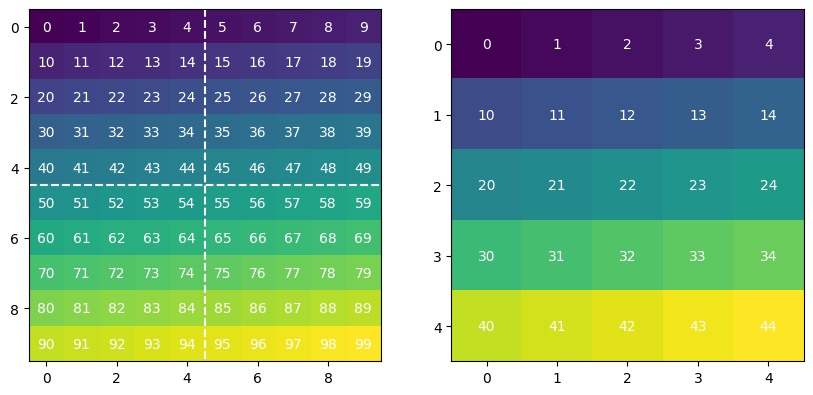

In [31]:
a = np.reshape(np.arange(0,100),[10,10])
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(a)
for i in range(len(a)):
    for j in range(len(a)):
        text = ax[0].text(j,i,a[i, j],
        ha="center", va="center", color="w")
ax[0].plot([-.5,9.5],[4.5,4.5],ls='--',c='w')
ax[0].plot([4.5,4.5],[-.5,9.5],ls='--',c='w')
b_ = np.array([np.arange(0,5)])
c_ = np.array([np.arange(0,41,10)]).T
b = b_+c_
ax[1].imshow(b)
for i in range(len(b)):
    for j in range(len(b)):
        text = ax[1].text(j, i, b[i, j],
                       ha="center", va="center", color="w")
